### Before you start, install the hurst package

pip install hurst

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
%matplotlib inline
from hurst import compute_Hc, random_walk #this package does all the heavy lifting for us

First let's get some data on oil prices from https://www.eia.gov/dnav/pet/PET_PRI_SPT_S1_D.htm

This data is the 'eia_prices.xls' in the repo

In [2]:
oil_price = pd.read_excel('eia_prices.xls', sheet_name='Data 1', header=2, index_col=[0], parse_dates=True).dropna() #read EIA workbook, open sheet named Data 1 and index with dates
oil_price.head() #quick look to make sure the data is ok, we also dropped the NaN values

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel)
Date,,
1987-05-20,19.75,18.63
1987-05-21,19.95,18.45
1987-05-22,19.68,18.55
1987-05-26,19.35,18.63
1987-05-27,19.38,18.60


You can change the dataframe to whatever time period you are interested in, you only need 100 samples to calculate the Hurst coefficient

In [3]:
current_year = oil_price.loc['2018-05-22':'2018-11-22'] #pick a period of interest

In [4]:
timeseries = current_year.iloc[:,0] #make a pandas series out of the dataframe and select the WTI column
type(timeseries)

pandas.core.series.Series

Text(0.5,1,'WTI Oil Prices')

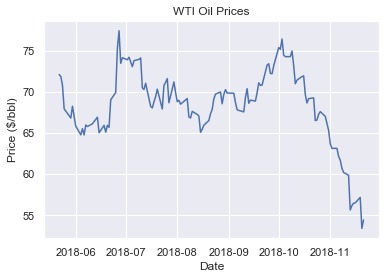

In [5]:
plt.plot(timeseries) #see what WTI prices were doing as a timeseries
plt.ylabel('Price ($/bbl)')
plt.xlabel('Date')
plt.title('WTI Oil Prices')

This next cell calculates our Hurst coefficient, we use the price as the kind, and use the simplified calculation

In [6]:
H, c, data = compute_Hc(timeseries, kind='price', simplified=True)

then we plot the data like they did in the example at https://pypi.org/project/hurst/

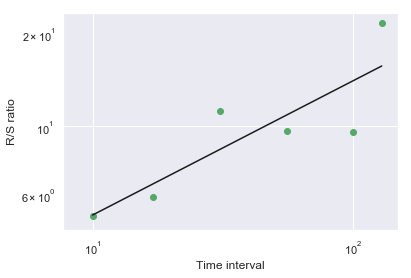

H=0.4373, c=1.8796


In [7]:
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, c='k')
ax.scatter(data[0], data[1], c='g')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

Our H value is 0.4373 which means that for the time period from May 22nd through November 22nd WTI oil prices were fluctuating. 

From Wikipedia "A value in the range 0 – 0.5 indicates a time series with long-term switching between high and low values in adjacent pairs, 
meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high, with this tendency 
to switch between high and low values lasting a long time into the future"

This notebook is licensed CC-BY and is free to share and use, for further information see the LICENSE.md in the main folder of this repository